ロジスティック回帰
==================

これまで学んできた線形回帰や多項式回帰は、連続的な数値を予測する**回帰問題**に用いられる手法でした。
例えば、収入から住宅価格を予測したり、広告費用から売上を予測したりするのに適しています。

しかし、現実世界には別のタイプの問題も多く存在します。

例えば、

- 画像を見て、そこに写っている動物が犬か猫かを判断する
- メールがスパムかどうかを判定する
- 患者のデータから特定の病気にかかっているかどうかを診断する

などです。

これらは分類問題と呼ばれ、データをあらかじめ定義されたカテゴリーやクラスへ分類することが目的です。

{index}`ロジスティック回帰<ロジスティック回帰>`は、このような分類問題、特に2つのクラスに分類する二値分類問題を解決するための手法です。
名前に**回帰**が含まれていますが、実際には分類のための手法であることに注意しましょう。

線形回帰とロジスティック回帰の特徴を以下にまとめます。

線形回帰
- 連続的な数値を予測
- 出力は$-\infty$から$+\infty$の範囲

ロジスティック回帰
- クラスの所属確率を予測
- 出力は0から1の範囲（確率）


ロジスティック回帰のキモは、線形関数の出力をシグモイド関数に通すことです。
シグモイド関数は以下の式で表されます。

```{math}
f(x) = \frac{1}{1 + e^{-x}}
```

この関数は、任意の実数を0から1の間の値に変換します。

シグモイド関数をグラフで表示してみます。

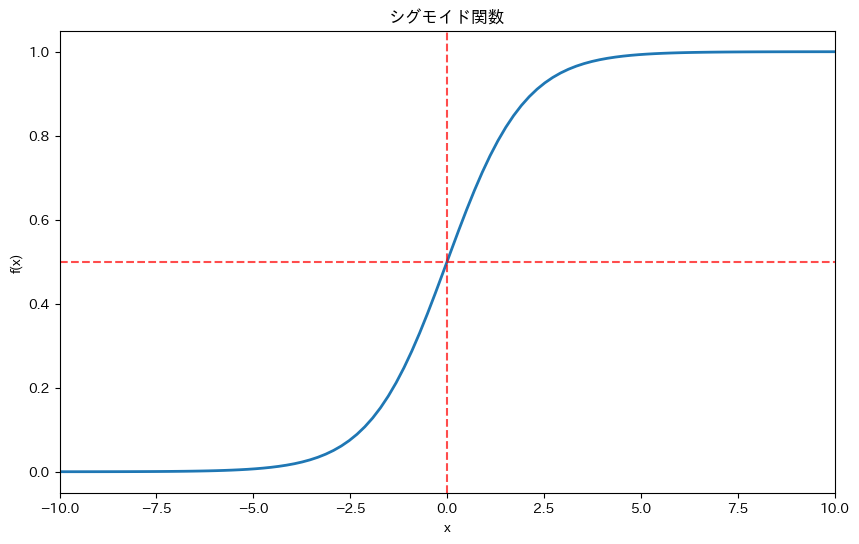

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, linewidth=2)
plt.title('シグモイド関数')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.7)

plt.xlim(-10, 10)
plt.show()

ご指摘ありがとうございます。より分かりやすく説明し、TEX形式の数式とPythonのサンプルコードを追加します。

## モデルの数学的表現

ロジスティック回帰モデルは2つの主要な部分から構成されます。

- 線形関数部分
- シグモイド関数部分

線形関数部分は以下のように表されます。

```{math}
z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n
```

ここで
- $x_1, x_2, ..., x_n$ は特徴量（説明変数）です。例えば、家の広さ、部屋数、築年数など。
- $\beta_0, \beta_1, \beta_2, ..., \beta_n$ はパラメータ（重み）です。モデルが学習する値です。
- $\beta_0$ は切片（バイアス項）で、他の全ての特徴量が0の時の基準値を表します。

次に、この線形関数の出力 $z$ をシグモイド関数に通します。

```{math}
P(y=1|x) = \frac{1}{1 + e^{-z}}
```
ここで
- $P(y=1|x)$ は、与えられた特徴量 $x$ に対してクラス1に属する確率を表します。
- $e$ はネイピア数（自然対数の底）です。

線形関数とシグモイド関数を組み合わせたこの式が、入力された特徴量に対して、クラス1に属する確率（0から1の間の値）を出力します。

## 分類

具体的な例を用いて、ロジスティック回帰で分類をしてみましょう。
学生の勉強時間と試験の合格/不合格を予測する例とします。
データは以下の条件で作成します。
- 学生100人
- 勉強時間は平均5時間、標準偏差2の正規分布
- 5時間以上でほぼ合格になるように調整

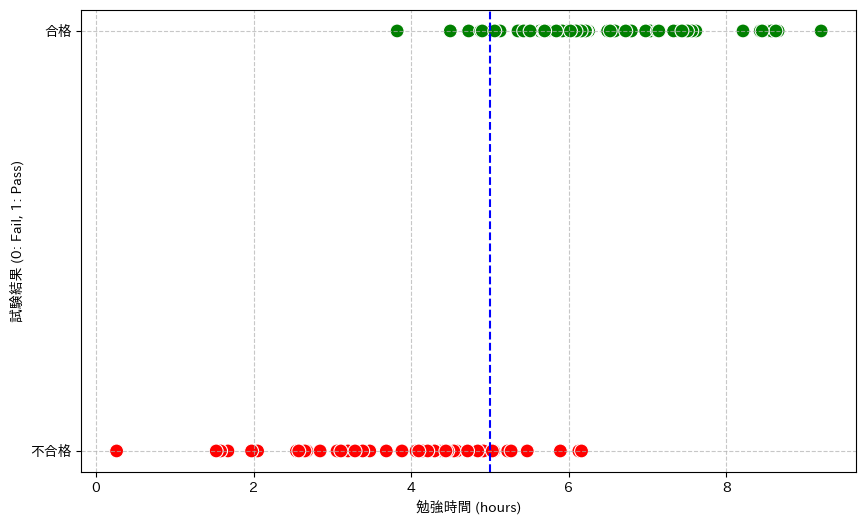

In [2]:
import pandas as pd

np.random.seed(42)
study_time = np.random.normal(5, 2, 100) + 0.5
pass_exam = (study_time + np.random.normal(0, 1, 100) > 5).astype(int)

data = pd.DataFrame({'study_time': study_time, 'pass_exam': pass_exam})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='study_time', y='pass_exam', hue='pass_exam', 
                palette={0: 'red', 1: 'green'}, s=100, legend=False)

plt.xlabel('勉強時間 (hours)')
plt.ylabel('試験結果 (0: Fail, 1: Pass)')

plt.yticks([0, 1], ['不合格', '合格'])
plt.axvline(x=5, color='blue', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

出力された図から、5時間を境目に合格が増えているのが分かります。

このデータを使ってロジスティック回帰で予測してみましょう。

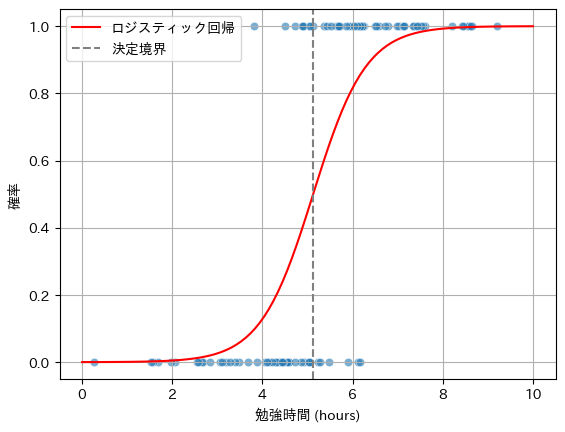

確率が0.5となる時間: 5.12時間
勉強時間が2時間で合格する確率: 0.00
勉強時間が4.5時間で合格する確率: 0.26
勉強時間が6時間で合格する確率: 0.82
勉強時間が8時間で合格する確率: 0.99


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  data[['study_time']], data['pass_exam'], test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

X_range = pd.DataFrame(np.linspace(0, 10, 100), columns=['study_time'])
y_proba = model.predict_proba(X_range)[:, 1]
plt.plot(X_range, y_proba, color='red', label='ロジスティック回帰')

sns.scatterplot(x='study_time', y='pass_exam', data=data, alpha=0.6)

intercept = model.intercept_[0]
coefficient = model.coef_[0][0]
decision_boundary_time = -intercept / coefficient

plt.axvline(x=decision_boundary_time, color='gray', linestyle='--', label='決定境界')
plt.xlabel('勉強時間 (hours)')
plt.ylabel('確率')
plt.legend()
plt.grid(True)
plt.show()

print(f"確率が0.5となる時間: {decision_boundary_time:.2f}時間")

for time in [2, 4.5, 6, 8]:
    prob = model.predict_proba(pd.DataFrame({'study_time': [time]}))[0][1]
    print(f"勉強時間が{time}時間で合格する確率: {prob:.2f}")

出力された結果について説明します。
図中の赤い曲線はロジスティック回帰モデルが予測する合格確率を表しています。
勉強時間が増えるにつれて、合格確率が上昇する様子が分かります。
また、灰色の点線は確率が0.5となる時間を示しています。
この線より右側（勉強時間が長い）では合格確率が0.5を超え、モデルは「合格」と予測します。

出力されたテキスト出力は、それぞれの時間での合格する確率です。
合格確率が0.5となる勉強時間は5.12時間です。

プログラムについて説明します。

1行目でロジスティック回帰モデルが使えるように`LogisticRegression`をインポートし、8行目でインスタンス化しています。
9行目でそのモデルを訓練データで学習させています。

11-13行目で学習されたモデルの予測曲線を滑らかに描画しています。
`predict_proba`は各クラス（不合格・合格）の確率を返すので、`[:, 1]`で合格の確率のみを取り出しています。
ちなみに、線形回帰モデルでは`predict`というメソッドでした。


## 評価指標

ロジスティック回帰モデルの性能評価には、以下のような指標が用いられます。
これらの評価指標は**分類**でよく用いられています。

- 正解率（Accuracy）
- 適合率（Precision）と再現率（Recall）
- F1スコア
- ROC曲線とAUC

これらの指標を実際にプログラムで使う前に、それぞれの指標について詳しく説明します。

### 混合行列

あなたはひよこ鑑定士のスキルを持って異世界に転生したとします。
今日は、100羽のひよこを見て、オスかメスかを判断しました。
その結果を以下の表に示します。

| 実際＼予測 | オス | メス |
|------------|------|------|
| オス       | 45   | 5    |
| メス       | 10   | 40   |

この表の意味は

- 左上 (45): 正しくオスだと判断した数（True Positive、TP）
- 右上 (5): オスなのにメスだと間違えた数（False Negative、FN）
- 左下 (10): メスなのにオスだと間違えた数（False Positive、FP）
- 右下 (40): 正しくメスだと判断した数（True Negative、TN）

となります。

このような表を{index}`混同行列<こんごうぎょうれつ - 混合行列>`（{index}`Confusion Matrix<Confusion Matrix>`）といいます。
混同行列とは、2値分類問題において、予測と実際の分類を行列形式にまとめた表になります。

さて、この混合行列を使って2値分類の評価指標を説明します。

- 正解率
  ```{math}
  Accuracy = \frac{TP + TN}{ TP + FP + TN + FN}
  ```
  正解率とは、全ての予測のうち、正解した予測の割合を指します。非常にシンプルで直感的にも解釈しやすい指標です。ひよこの例で計算すると正解率は$(45 + 40) / 100 = 0.85$となります。ちなみにひよこ鑑定士は平均的に1羽にかける時間は約3.5秒で、1時間で約1,000羽を鑑別します。また、その正解率は98から100％を求められます。

- 適合率
  ```{math}
  Precision = \frac{TP}{ TP + FP}
  ```
  適合率は、陽性（オス）と予測したもののうち、実際に陽性（オス）であるものの割合を表す指標です。適合率は、FPを小さくすることを重視する指標です。誤って陽性と判断しては困る場合に用いると有効です。ひよこの例で計算すると適合率は$45 / (45 + 10) \approx 0.818$となります。

- 再現率
   ```{math}
   Recall = \frac{TP}{TP + FN}
   ```
   再現率（感度）は、実際に陽性であるもののうち、正しく陽性と予測できたものの割合です。適合率と対照的に、FNを小さくすることを重視する指標です。誤って陰性と判断しては困る場合に用いると有効です。病気の判断などが当てはまるでしょう。ひよこの例で計算すると再現率は$45 / (45 + 5) = 0.9$となります。

- F1スコア（F値）
  ```{math}
  F-measure = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}
  ```
  F値は適合率と再現率の調和平均です。両方の特徴をバランスよく含んでいる指標と言えるでしょう。ひよこの例で計算するとF値は$\displaystyle\frac{2 \times 0.818 \times 0.9}{0.818 + 0.9} \approx 0.857$となります。

この混同行列から、あなたはオスの判別は得意（90%の再現率）ですが、メスを見分けるのはやや苦手（80%の再現率）だということが分かります。また、メスをオスと間違える（10羽）よりも、オスをメスと間違える（5羽）ほうが少ないことも分かります。

このように、混同行列を使うと、単純な正解率だけでなく、どのような間違いが多いのか、どちらの性別の判別が得意なのかなど、より詳細な分析ができます。これにより、あなたの鑑定スキルのどこを改善すべきかが明確になります。例えば、メスの特徴をもっと学習する必要があるかもしれません。

### AUC（Area Under the Curve）

先ほどのモデルを使用し、テストデータで評価を行います。
正解率、適合率、再現率、F1スコア、ROC曲線、AUCを計算し表示するプログラムを書いてみましょう。

正解率 (Accuracy): 0.8500
適合率 (Precision): 0.9000
再現率 (Recall): 0.8182
F1スコア: 0.8571
AUC: 0.9394


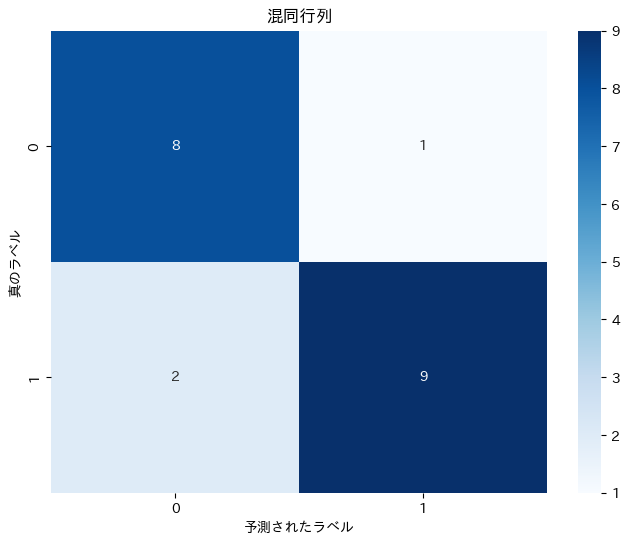

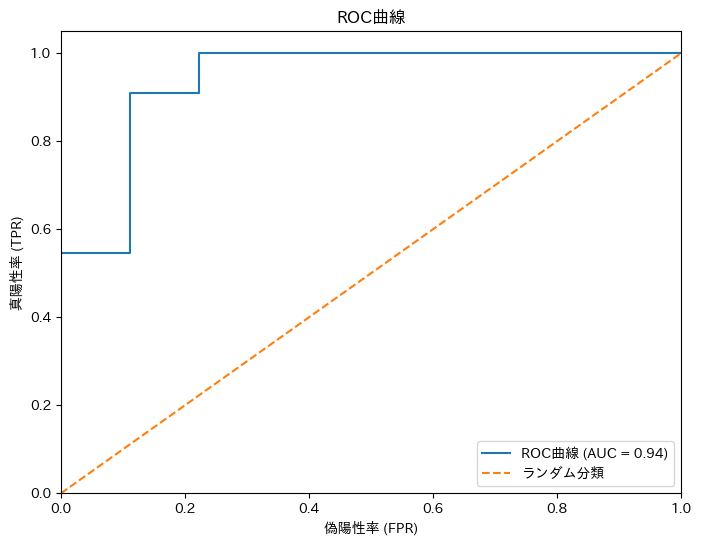

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"正解率 (Accuracy): {accuracy:.4f}")
print(f"適合率 (Precision): {precision:.4f}")
print(f"再現率 (Recall): {recall:.4f}")
print(f"F1スコア: {f1:.4f}")
print(f"AUC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('混同行列')
plt.ylabel('真のラベル')
plt.xlabel('予測されたラベル')
plt.show()

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC曲線 (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='ランダム分類')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽陽性率 (FPR)')
plt.ylabel('真陽性率 (TPR)')
plt.title('ROC曲線')
plt.legend(loc="lower right")
plt.show()

AUC（Area Under the Curve）は名前の通り、ある曲線の下側の面積の大きさで分類予測を評価する指標です。
面積は0から1の範囲で変動し、AUCが大きいほど優れた予測だといえます。

ここでは、AUCを算出するための曲線として、ROC曲線を使います。
ROC曲線は、以下の軸を持ちます。

- 横軸：偽陽性率（False Positive Rate、FPR）
- 縦軸：真陽性率（True Positive Rate、TPR）または再現率（Recall）

プログラムの結果でROC曲線を出力しています。

## 実践

ここでは、タイタニックデータセットを使って、生き残ったかどうかの2値分類をロジスティック回帰を使って予測しましょう。

タイタニックデータセットは、1912年に沈没したタイタニック号の乗客情報を含んでおり、
生存状況の予測でよく使われる有名なデータセットです。

まずは、データを読み込んで確認してみましょう。

In [5]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


それぞれの列の意味は以下のようになります。

- `survived`: 生存 (0/1)
- `pclass`: 乗客クラス（1＝1等、2＝2等、3＝3等）
- `sex`: 性別 (male/female)
- `age`: 年齢
- `sibsp`: 同乗の兄弟姉妹・配偶者の数
- `parch`: 同乗の親・子供の数
- `fare`: 料金
- `embarked`: 乗船港 (C = Cherbourg, Q = Queenstown, S = Southampton)
- `class`: 乗客クラス (First/Second/Third)
- `who`: 男女子供 (man/woman/child)
- `adult_male`: 成人男性 (True/False)
- `deck`: デッキ (A〜G)
- `embark_town`: 乗船港 (Cherbourg/Queenstown/Southampton)
- `alive`: 生存 (yes/no)
- `alone`: 一人旅 (True/False)

`survived`が予測したい値（目的変数）、それ以外が特徴量として予測をします。
ただし、いくつかの項目は内容が同じであったり、他の項目から計算できたりするため、
すべての特徴量を使うのではなく、予測したい値に関係ありそうな特徴量を選ぶ必要があります。

欠損値があるデータは扱いたくないので、確認します。

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

`df.isna().sum()`は各列の欠損値（NaN）の数をカウントします。
`isna()`は各要素に対して欠損値かどうかをチェックし、
欠損値の場合は`True`、そうでない場合は`False`という**ブール値**が入った元のデータフレームと同じ形状の新しいデータフレームが生成されます。
`sum()`は生成されたブール値のデータフレームの各カラムに対して合計を計算します。
`True`は1、`False`は0として扱われるため、この合計は各カラムの欠損値の数を表します。

また、最後に出力されている`dtype:int64`は、データが64ビット整数型であることを示しています。
大きな値を扱えるように64ビットとなっています。

`deck`は欠損値を多く含んでいるため、考慮する特徴量から除外します。
また、`alive`は`survived`と同じ情報を表しているため、これを特徴量として使用すると、
予測対象である生存情報を直接使用してしまうため、適切ではありません。
他にも`alone`などは`sibsp`と`parch`を足して0の時にTrueになるようになっていため、除外します。

選んだ特徴量だけを残し、`age`の欠損値は中央値で埋めます。
残りの欠損値を含む行は除外します。

In [7]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()
df['age'] = df['age'].fillna(df['age'].median())
df = df.dropna()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


2行目は`age`列の欠損値を中央値で埋めています。
`df['age'].median()`で年齢の中央値を計算し、それを使って`fillna`メソッドで欠損値を置き換えています。
`fillna`は`fill`（埋める）と`NA`（Not Available）が組み合わさった用語です。

3行目は、`dropna`メソッドを使用して、残りの欠損値を含む行をすべて削除しています。
これにより、データセットから欠損値が完全に除去されます。

次にデータを目的変数と特徴量に分けます。

In [8]:
X = df.drop('survived', axis=1)
y = df['survived']

この特徴量にはカテゴリカル変数があります（`sex`の`female`など）。
そのため、pandasのカテゴリカルデータ型を使って、数値へ変換します。

In [9]:
X['sex'] = pd.Categorical(X['sex'], categories=['female', 'male']).codes
X['embarked'] = pd.Categorical(X['embarked'], categories=['C', 'S', 'Q']).codes
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,28.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,0


このプログラムは、`sex`と`embarked`という2つの列のデータを、文字列から数値に変換しています。
`pd.Categorical()`はデータをカテゴリ（分類）として扱うようPandasに指示する関数です。
カテゴリとは、限られた種類の値のことです。例えば、性別は「女性」か「男性」の2種類しかありません。
`categories=`でそのカテゴリにどんな種類があるかを明示的に指定しています。
`.codes`は、カテゴリを数値に変換するよう指示しています。

ここまでで、目的変数は7つに絞られ、予測に使うデータが準備できました。

ロジスティック回帰を使って、タイタニックの生存者を予測してみましょう。
プログラムを以下に示します。

正解率（Accuracy）: 0.787
適合率（Precision）: 0.707
再現率（Recall）: 0.768
F1スコア: 0.736
AUC: 0.856


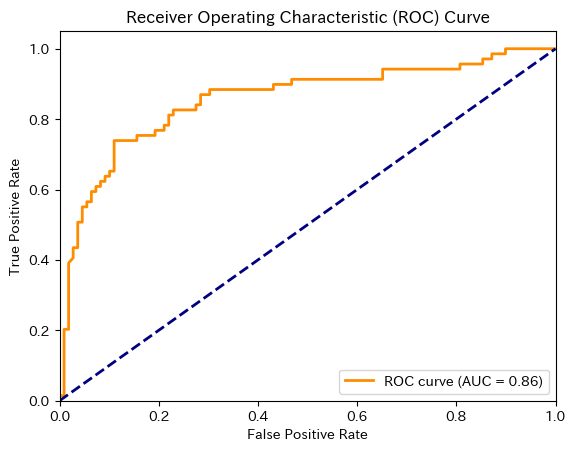

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"正解率（Accuracy）: {accuracy:.3f}")
print(f"適合率（Precision）: {precision:.3f}")
print(f"再現率（Recall）: {recall:.3f}")
print(f"F1スコア: {f1:.3f}")
print(f"AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

このプログラムでは、モデルの性能を評価するため以下の指標を使っています。

- 正解率（Accuracy）：全体の予測のうち、正しく予測できた割合
- 適合率（Precision）：「生存」と予測したもののうち、実際に生存していた割合
- 再現率（Recall）：実際の生存者のうち、正しく「生存」と予測できた割合
- F1スコア：適合率と再現率の調和平均
- AUC：ROC曲線の下部の面積。1に近いほど良いモデル

結果の評価指標を見て、どのような感想を持ったでしょうか。
正解率は80%近いので悪くはないと思いますが、人の生死に関わる問題だからもっと高くないとダメだと思う人もいるでしょう。
実践では、その問題の評価については自分で考えた基準で判断するようにしてください。